## 1 工具导入和数据读取

### 工具导入

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

### 数据读取

In [30]:
"""
读取数据集
"""
test_data = pd.read_csv('./data/data_format1/test_format1.csv')
train_data = pd.read_csv('./data/data_format1/train_format1.csv')

user_info = pd.read_csv('./data/data_format1/user_info_format1.csv')
user_log = pd.read_csv('./data/data_format1/user_log_format1.csv')

#user_info = pd.read_csv('./data_format1/user_info_format1.csv').drop_duplicates()
#user_log = pd.read_csv('./data_format1/user_log_format1.csv').rename(columns={"seller_id":'merchant_id'})


### 数据集样例查看

In [31]:
train_data.head(5)

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [32]:
test_data.head(5)

,user_id,merchant_id,prob
0,163968,4605,NaN
1,360576,1581,NaN
2,98688,1964,NaN
3,98688,3645,NaN
4,295296,3361,NaN


In [33]:
user_info.head(5)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [34]:
user_log.head(5)

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


## 2 单变量数据分析

### 2.1 数据类型和数据大小

**用户信息数据**

1. 数据集中共有2个float64类型和1个int64类型的数据
2. 数据大小9.7MB
3. 数据集共有424170条数据

In [35]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


**用户行为数据**

1. 数据集中共有6个int64类型和1个float64类型的数据
2. 数据大小2.9GB
3. 数据集共有54925330条数据

In [36]:
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


**用户购买训练数据**

1. 数据均为int64类型
2. 数据大小6MB
3. 数据集共有260864条数据

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int64
 1   merchant_id  260864 non-null  int64
 2   label        260864 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


### 2.2 缺失值查看


使用Pandas中count()函数及shape()函数进行统计：count()函数可以统计不为空数据的个数；shape()函数则可以统计数据样本的个数；将shape()函数与count()函数做差就可以得到数据的缺失个数，再用缺失的个数除以样本的个数来计算样本中此字段的缺失率。

**（1）用户信息数据缺失，年龄值缺失情况**

In [38]:
(user_info.shape[0]-user_info['age_range'].count())/user_info.shape[0]

0.005226677982884221

In [39]:
user_info[user_info['age_range'].isna() | (user_info['age_range'] == 0)].count()

user_id      95131
age_range    92914
gender       90664
dtype: int64

In [40]:
user_info.groupby(['age_range'])[['user_id']].count()

,user_id
age_range,
0.0,92914
1.0,24
2.0,52871
3.0,111654
4.0,79991
5.0,40777
6.0,35464
7.0,6992
8.0,1266


1. 年龄值为空的缺失率为0.5%
2. 年龄值缺失或者年龄值默认为0时，可认为数据缺失
3. 有缺失值的数据共计95131条数据

**（2）查看性别缺失情况**

In [41]:
(user_info.shape[0]-user_info['gender'].count())/user_info.shape[0]

0.01517316170403376

In [42]:
user_info[user_info['gender'].isna() | (user_info['gender'] == 2)].count()

user_id      16862
age_range    14664
gender       10426
dtype: int64

In [43]:
user_info.groupby(['gender'])[['user_id']].count()

,user_id
gender,
0.0,285638
1.0,121670
2.0,10426


1. 性别值为空的缺失率 1.5%
2. 当性别值缺失或者性别值默认为2时，可认为该数据缺失
3. 有缺失值的数据共计16862条数据

**（3）查看年龄或者性别其中有一个有缺失的情况**

共计106330条数据

In [44]:
user_info[user_info['age_range'].isna() | (user_info['age_range'] == 0) | user_info['gender'].isna() | (user_info['gender'] == 2)].count()

user_id      106330
age_range    104113
gender        99894
dtype: int64

**（4）用户行为日志信息**

brand_id字段有91015条缺失数据

In [45]:
user_log.isna().sum()

user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

## 3 观察数据分布

### 3.1 整体数据统计信息

In [46]:
user_info.describe()

,user_id,age_range,gender
count,424170.000000,421953.000000,417734.000000
mean,212085.500000,2.930262,0.341179
std,122447.476178,1.942978,0.524112
min,1.000000,0.000000,0.000000
25%,106043.250000,2.000000,0.000000
50%,212085.500000,3.000000,0.000000
75%,318127.750000,4.000000,1.000000
max,424170.000000,8.000000,2.000000


In [47]:
user_log.describe()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
count,5.492533e+07,5.492533e+07,5.492533e+07,5.492533e+07,5.483432e+07,5.492533e+07,5.492533e+07
mean,2.121568e+05,5.538613e+05,8.770308e+02,2.470941e+03,4.153348e+03,9.230953e+02,2.854458e-01
std,1.222872e+05,3.221459e+05,4.486269e+02,1.473310e+03,2.397679e+03,1.954305e+02,8.075806e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.110000e+02,0.000000e+00
25%,1.063360e+05,2.731680e+05,5.550000e+02,1.151000e+03,2.027000e+03,7.300000e+02,0.000000e+00
50%,2.126540e+05,5.555290e+05,8.210000e+02,2.459000e+03,4.065000e+03,1.010000e+03,0.000000e+00
75%,3.177500e+05,8.306890e+05,1.252000e+03,3.760000e+03,6.196000e+03,1.109000e+03,0.000000e+00
max,4.241700e+05,1.113166e+06,1.671000e+03,4.995000e+03,8.477000e+03,1.112000e+03,3.000000e+00


### 3.2查看正负样本的分布并可视化

正负样本的数量：
 label
0    244912
1     15952
Name: user_id, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

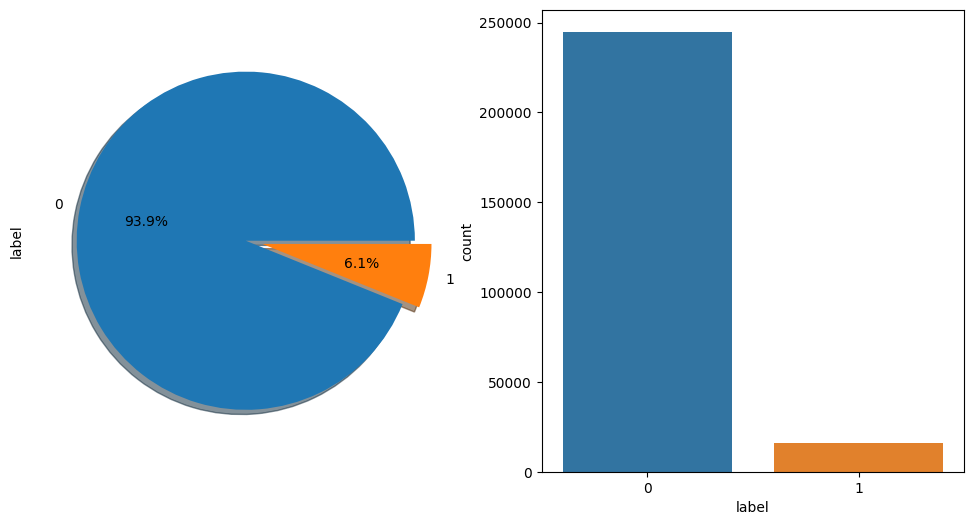

In [48]:
label_gp = train_data.groupby('label')['user_id'].count()
print('正负样本的数量：\n',label_gp)
_,axe = plt.subplots(1,2,figsize=(12,6))
train_data.label.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1],ax=axe[0])
sns.countplot(x='label',data=train_data,ax=axe[1],)

从上图可以看出，样本的分布不均衡，需要采取一定的措施处理样本不均衡的问题：

* 类似欠采样,将一份正样本和多分负样本组合成多分训练集,训练多个模型后求平均
* 调整模型的权重

#### 代码解释

1. `_, axe = plt.subplots(1, 2, figsize=(12, 6))`: 创建一个包含两个子图的画布，并将其返回给 `_` 和 `axe`。这里使用了 `plt.subplots()` 方法创建画布，参数 `1, 2` 表示子图的行数和列数，`figsize=(12, 6)` 设置了画布的大小为 12x6。

 `plt.subplots()` 方法返回一个包含子图的画布对象和子图对象的元组。`_` 是用来忽略画布对象的变量名，而 `axe` 是用来存储子图对象的变量名。通常情况下，我们只对子图对象进行操作和引用，因此将其赋值给 `axe` 变量以便后续使用。



2. `train_data.label.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0, 0.1], ax=axe[0])`: 针对 `train_data` 数据集中的 `label` 列进行计数，并生成一个饼图。`value_counts()` 方法用于计算每个 label 的出现次数，`plot()` 方法用于绘制饼图。`kind='pie'` 设置图表类型为饼图，`autopct='%1.1f%%'` 设置饼图中每个部分的百分比显示格式，`shadow=True` 添加阴影效果，`explode=[0, 0.1]` 表示将第二个 label 分割出来以突出显示，`ax=axe[0]` 指定绘制在第一个子图上。

 `explode=[0, 0.1]` 是设置饼图中各个扇形分离的程度的参数。`explode` 参数是一个列表，其中每个元素代表对应扇形与圆心的距离（以半径为单位）。具体来说，`[0, 0.1]` 表示第一个扇形不分离（与圆心距离为0），而第二个扇形与圆心分离出一个相对半径为0.1的距离。通过设置不同的 `explode` 参数，可以实现突出显示某些扇形的效果，使其凸出或分离出来以强调重要性或区分度。在这段代码中，通过 `explode=[0, 0.1]` 的设定，使得饼图中的第二个 label 扇形相对于圆心稍微分离出来。



3. `sns.countplot('label', data=train_data, ax=axe[1])`: 使用 seaborn 库的 `countplot()` 方法绘制柱状图。该方法用于显示某个变量（在这里是 `label` 列）的频数。`'label'` 是指定要绘制的变量名称，`data=train_data` 指定数据来源为 `train_data` 数据集，`ax=axe[1]` 指定绘制在第二个子图上。


## 4 探查影响复购的各种因素 
探查店铺、用户、性别以及年龄对复购的影响

### 4.1 对店铺分析

**（1）分析不同店铺与复购关系，并可视化展示**

选取top5店铺
店铺	购买次数
4044    3379
3828    3254
4173    2542
1102    2483
4976    1925
Name: merchant_id, dtype: int64


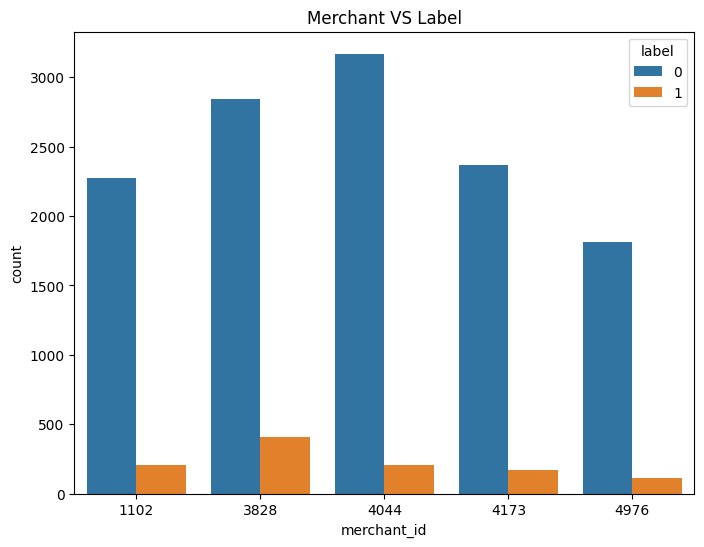

In [52]:
print('选取top5店铺\n店铺\t购买次数')
print(train_data.merchant_id.value_counts().head(5))
train_data_merchant = train_data.copy()
train_data_merchant['TOP5'] = train_data_merchant['merchant_id'].map(lambda x: 1 if x in [4044,3828,4173,1102,4976] else 0)
train_data_merchant = train_data_merchant[train_data_merchant['TOP5']==1]
plt.figure(figsize=(8,6))
plt.title('Merchant VS Label')
ax = sns.countplot(x='merchant_id',hue='label',data=train_data_merchant)
#for p in ax.patches:
    #height = p.get_height()

从图可以看出不同店铺有不同复购率，可能与不同店铺售卖的商品有关，以及店铺的运营有关。

#### 代码解释


1、

```python
train_data_merchant['TOP5'] = train_data_merchant['merchant_id'].map(lambda x: 1 if x in [4044, 3828, 4173, 1102, 4976] else 0)
```

- `train_data_merchant['TOP5']`：使用 `train_data_merchant` 数据集的索引操作符 `[]`，选择 `train_data_merchant` 数据集的列 `'TOP5'`。
- `train_data_merchant['merchant_id']`：选择 `train_data_merchant` 数据集中的 `'merchant_id'` 列。
- `.map(lambda x: 1 if x in [4044, 3828, 4173, 1102, 4976] else 0)`：使用 `map()` 函数对 `'merchant_id'` 列中的每个值应用 lambda 函数进行映射。如果该值在 `[4044, 3828, 4173, 1102, 4976]` 中，则映射为 1，否则为 0。
- 最后，将得到的映射结果赋值给 `'TOP5'` 列，从而实现了对 `train_data_merchant` 数据集的新列的添加。


2、`lambda`


1. `lambda x:`：表示创建匿名函数，而 `x` 是匿名函数的参数。在本例中，`x` 用于表示 `merchant_id` 列中的每个值。

2. `1 if x in [4044, 3828, 4173, 1102, 4976] else 0`：这是一个条件表达式，它根据 `x` 是否在 `[4044, 3828, 4173, 1102, 4976]` 列表中返回相应的值。

   - 如果 `x` 的值在列表 `[4044, 3828, 4173, 1102, 4976]` 中，条件成立，返回结果为 1。
   
   - 如果 `x` 的值不在列表中，条件不成立，返回结果为 0。

3. `train_data_merchant['merchant_id'].map(lambda x: 1 if x in [4044, 3828, 4173, 1102, 4976] else 0)`：这行代码将 `lambda` 函数应用于 `merchant_id` 列中的每个值，并通过 `map()` 函数将映射结果赋值给 `TOP5` 列。

    - 对于 `merchant_id` 列中的每个值 `x`，`lambda` 函数根据条件表达式返回相应结果。
    
    - 最终， `TOP5` 列将包含相应的映射结果，1 表示 `merchant_id` 值在 `[4044, 3828, 4173, 1102, 4976]` 中，0 表示不在其中。


**（2）查看店铺复购概率分布**

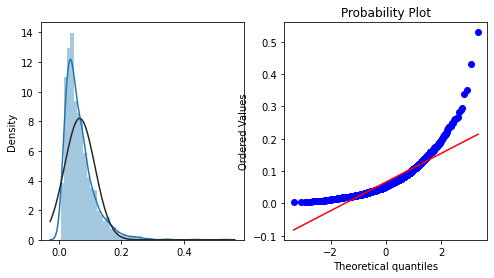

In [22]:
merchant_repeat_buy = [ rate for rate in train_data.groupby(['merchant_id'])['label'].mean() if rate <= 1 and rate > 0] 

plt.figure(figsize=(8,4))
ax=plt.subplot(1,2,1)
sns.distplot(merchant_repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(merchant_repeat_buy, plot=plt)

这两幅图分别是概率密度图和概率图，反映了店铺的复购概率分布情况。可以看出不同店铺有不同复购率，大致在0-0.3之间

其中，概率密度图反映了复购概率的分布形态，以及是否满足正态分布假设。如果概率密度图接近正态分布曲线，则说明复购概率分布符合正态分布假设，否则说明分布形态可能存在偏差或者异常值。

概率图则反映了复购概率的数值范围和分布情况，包括四分位数、中位数、最大值、最小值等信息，可以帮助我们更直观地了解店铺复购概率的整体情况和分布特征。同时，通过比较不同店铺的概率图，可以看出不同店铺的复购概率分布情况是否存在明显差异。

#### 代码解释
`train_data.groupby(['merchant_id'])['label'].mean()`

这行代码对 `train_data` 数据集进行了分组操作，并计算了每个 `merchant_id` 对应的 `label` 列的均值。


1. `train_data.groupby(['merchant_id'])`：这部分代码使用 `groupby()` 函数将数据集按照 `merchant_id` 列进行分组。

   - `groupby()` 用于按照指定的列对数据进行分组。

   - `['merchant_id']` 参数指定根据哪一列进行分组。

2. `['label'].mean()`：这部分代码在分组后的结果上，选择了 `label` 列，并调用 `mean()` 方法计算了均值。

   - `['label']` 表示从分组结果中选择了 `label` 列。

   - `.mean()` 是 pandas 的一个方法，计算了选定列的均值。

最终，这行代码将返回一个以 `merchant_id` 为索引的 Series 对象，其中包含每个 `merchant_id` 对应的 `label` 列的均值。

例如，如果有以下数据：

```
merchant_id   label
    M1          1
    M1          0
    M2          0
    M2          1
```

那么执行 `train_data.groupby(['merchant_id'])['label'].mean()` 的结果将是：

```
merchant_id
    M1       0.5
    M2       0.5
    ...
```

其中，`M1` 对应的均值为 `0.5`，`M2` 对应的均值也为 `0.5`。

### 4.2 对用户分析 
查看用户复购率分布   

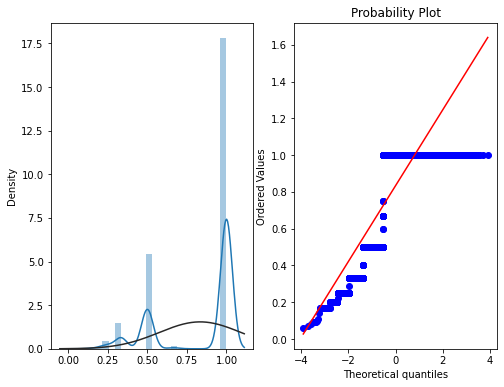

In [23]:
user_repeat_buy = [rate for rate in train_data.groupby(['user_id'])['label'].mean() if rate <= 1 and rate > 0] 

plt.figure(figsize=(8,6))
ax=plt.subplot(1,2,1)
sns.distplot(user_repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(user_repeat_buy, plot=plt)

可以看出近6个月，用户复购率很小，基本买一次为主

### 4.3 对用户性别分析
**（1）分析用户性别与复购的关系**

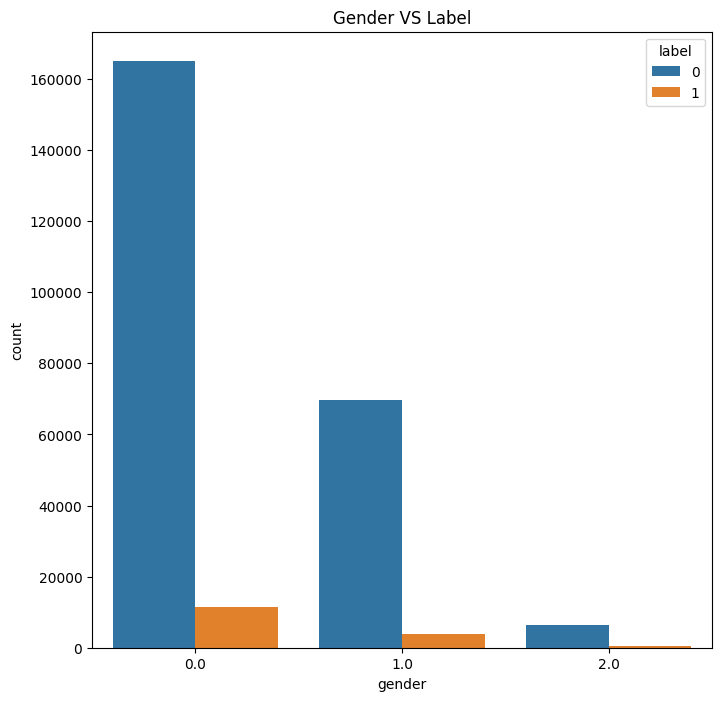

In [54]:
train_data_user_info = train_data.merge(user_info,on=['user_id'],how='left')

plt.figure(figsize=(8,8))
plt.title('Gender VS Label')
ax = sns.countplot(x='gender',hue='label',data=train_data_user_info)
for p in ax.patches:
    height = p.get_height()

#### 代码解释
`train_data_user_info = train_data.merge(user_info,on=['user_id'],how='left')`

将 `train_data` 数据集和 `user_info` 用户信息数据集按照 `user_id` 进行左连接（left join）操作，将两个数据集中的所有行按照 `user_id` 进行匹配，将匹配成功的行合并到一起。

其中 `train_data` 和 `user_info` 分别表示要进行连接的两个数据集，`on=['user_id']` 指定连接键为 `user_id` 列，`how='left'` 指定连接方式为左连接（即以 `train_data` 数据集为基础进行连接，将 `user_info` 数据集中匹配不上的行填充为缺失值）。最终，该代码将新生成一个包含用户信息的 `train_data_user_info` 数据集。

**(2)查看用户性别复购的分布**

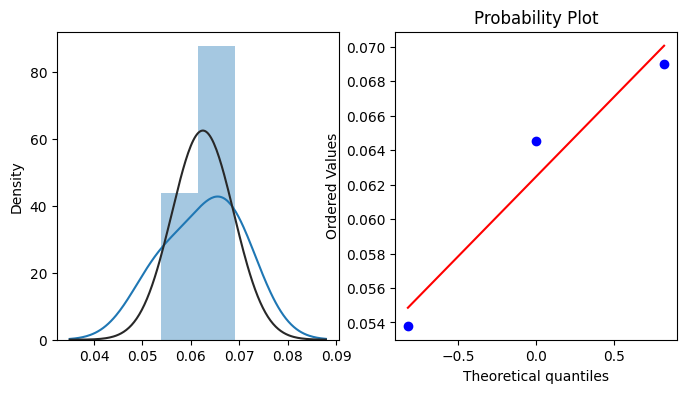

In [55]:
repeat_buy = [rate for rate in train_data_user_info.groupby(['gender'])['label'].mean()] 

plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.distplot(repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(repeat_buy, plot=plt)

可以看出男女的复购率不一样

### 4.3 对用户年龄分析
**（1）查看用户年龄与复购的关系**

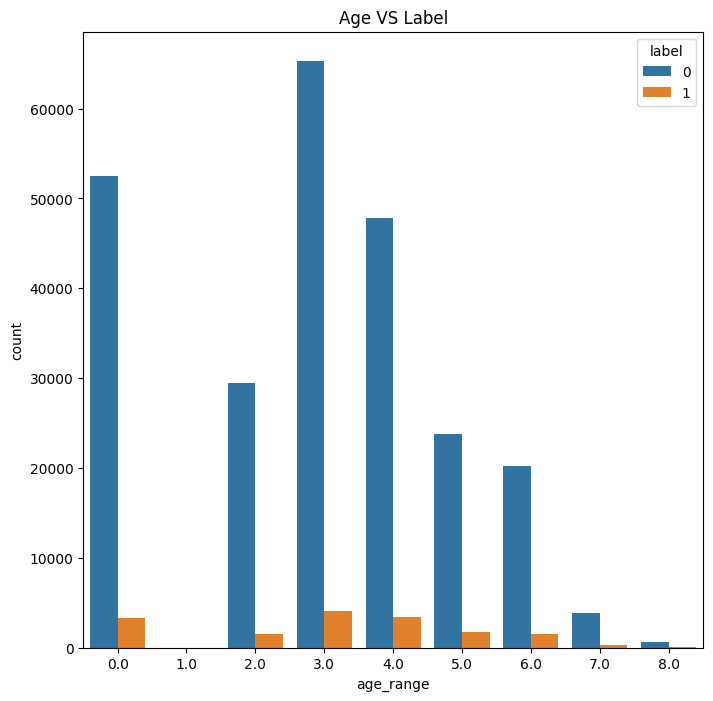

In [56]:
plt.figure(figsize=(8,8))
plt.title('Age VS Label')
ax = sns.countplot(x='age_range',hue='label',data=train_data_user_info)

**(2)查看用户年龄复购的分布**

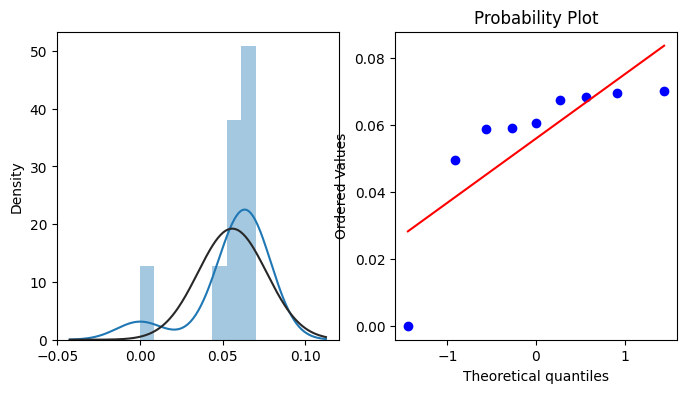

In [57]:
repeat_buy = [rate for rate in train_data_user_info.groupby(['age_range'])['label'].mean()] 

plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.distplot(repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(repeat_buy, plot=plt)

可以看出不同年龄段，复购概率不同